#**2. Classification**

#Step 1: Import library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

#Step 2: Import Data

In [4]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/IRIS.csv')

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#**Encoding y='species' into binary as it is in text format**

In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
fn=df[['species']]
df[['species']]=oe.fit_transform(fn)

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.shape

(150, 5)

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#Statistical Representation of how the other features are related to the target

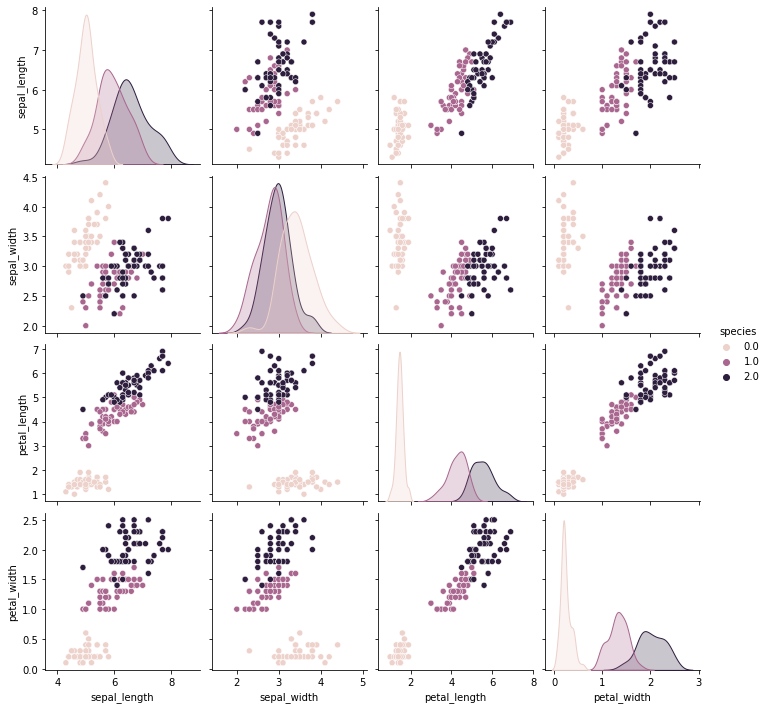

In [12]:
sns.pairplot(df,hue='species')

#Step 3. Define y X

In [13]:
y = df['species']

In [14]:
y.shape

(150,)

In [15]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [16]:
#X=df.drop(['species'],axis=1)
#or
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [17]:
X.shape

(150, 4)

In [18]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#Standardizing X

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

#Step 4: Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=2529)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

#Step 5: Creating Model

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [24]:
#from sklearn.neighbors import KNeighborsClassifier
#model=KNeighborsClassifier()

In [25]:
#from sklearn.tree import DecisionTreeClassifier
#model=DecisionTreeClassifier()

#Step 6: Training Model

In [26]:
model.fit(X_train,y_train)

LogisticRegression()

#Step 7: Predicting Model

In [27]:
y_pred=model.predict(X_test)

In [28]:
y_pred

array([0., 2., 0., 1., 0., 0., 1., 1., 2., 0., 2., 0., 0., 0., 0., 2., 0.,
       2., 1., 1., 1., 0., 1., 2., 2., 2., 2., 1., 1., 1., 0., 1., 1., 2.,
       0., 1., 1., 1., 2., 0., 2., 0., 1., 1., 2.])

#Step 8: Accuracy

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.88      1.00      0.94        15
         2.0       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



#__Future Predictions Example__

In [32]:
df_new=df.sample(1)

In [33]:
df_new

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,2.0


In [34]:
X_new=df_new.drop(['species'],axis=1)
X_new

,sepal_length,sepal_width,petal_length,petal_width
139,6.9,3.1,5.4,2.1


In [35]:
X_new.shape

(1, 4)

In [36]:
y_pred_new=model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [37]:
y_pred_new

array([2.])

Link for the same: https://colab.research.google.com/drive/1XU36AcW9bfAnZnTYZRni-22pvmOPLiFn?usp=sharing